# Notebook to plot power spectra and CF for the halos and cdm

## Loading packages

In [45]:
import numpy as np
# import MAS_library as MASL
import plotting_library as PL
from pylab import *
from matplotlib.colors import LogNorm
import matplotlib as plt
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
text_size=26
fig_size_x=24
fig_size_y=14
from collections import defaultdict

import seaborn as sns
Colors = sns.color_palette("colorblind", 16).as_hex()
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import interpolate


## Nested dictionary

In [3]:
def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
    
data = nested_dict(5, list)
pow_gev = nested_dict(2, list)
pow_lightcone = nested_dict(2, list)
class_data = nested_dict(3, list)
class_tk = nested_dict(4, list)
rsd_coeff = nested_dict(2, list)

## Loading power and CF data

In [117]:
directory = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/Powerpsectra_correlationfunction_particles_Pylians/"
directory_halo = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/Power_spectra_correlation_function_RSD_noRSD_Halos/"
directory_power = "/Users/farbod/Dropbox/Projects/Doppler_RSD//Data/Doppler_project_PowerSpectra_data//"
directory_lightcone = "/Users/farbod/Dropbox/Projects/Doppler_RSD//Data/Lightcone_project_PowerSpectra_data//"

files=["gevolution_boxsize_4032_ngrid_4608_lcdm_05062020",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_1_05062020",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020",
       "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em4_05062020",
        "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020"];

redshifts = ["0", "0.5", "1", "2", "3"];
files_list = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];

for j in range(5):
    for i in range(5):
        data['cdm']['noRSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory+"/no_RSD/pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        data['cdm']['RSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory+"/RSD_pcls/pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        data['cdm']['noRSD'][files_list[j]]['cor']['z='+str(redshifts[i])]=load(directory+"/no_RSD/CF_full_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        data['cdm']['RSD'][files_list[j]]['cor']['z='+str(redshifts[i])]=load(directory+"/RSD_pcls/CF_full_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        
        data['halo']['noRSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory_halo+"/no_RSD//pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        data['halo']['RSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory_halo+"/RSD/pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        data['halo']['noRSD'][files_list[j]]['cor']['z='+str(redshifts[i])]=load(directory_halo+"/no_RSD//CF_full_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        data['halo']['RSD'][files_list[j]]['cor']['z='+str(redshifts[i])]=load(directory_halo+"/RSD/CF_full_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        
        
#gevolution powerspectra
z_gev= ["100", "50", "30", "20", "10", "6", "4", "3", "2.5", "2", "1.5", "1", "0.75", "0.5", "0.25", "0.1", "0"]
z_kev= ["100", "50", "30", "10", "4", "3", "2.5", "2", "1.5", "1", "0.75", "0.5", "0.25", "0.1", "0"]

for j in range(5):
    for i in range(np.shape(z_gev)[0]):

        pow_gev['gev_lcdm']['z='+str(z_gev[i])]=np.loadtxt(directory_power+files[0]+"/output/lcdm_pk"+str(i).zfill(3)+"_deltacdm.dat");
        pow_gev['gev_em0']['z='+str(z_gev[i])]=np.loadtxt(directory_power+files[1]+"/output/w0d9_cs1_gevolution_pk"+str(i).zfill(3)+"_deltacdm.dat");
        pow_gev['gev_em7']['z='+str(z_gev[i])]=np.loadtxt(directory_power+files[2]+"/output/w0d9_cs2_em7_gevolution_pk"+str(i).zfill(3)+"_deltacdm.dat");
    for i in range(np.shape(z_kev)[0]):   
        pow_gev['kev_em4']['z='+str(z_kev[i])]=np.loadtxt(directory_power+files[3]+"/output/kess_cs2e4_4032box_4608_pk"+str(i).zfill(3)+"_deltacdm.dat");
        pow_gev['kev_em7']['z='+str(z_kev[i])]=np.loadtxt(directory_power+files[4]+"/output/kess_cs2e7_4032box_4608_pk"+str(i).zfill(3)+"_deltacdm.dat");

        
        
#gevolution powerspectra Lightcone project
z_gev= ["50", "30", "10", "4", "3", "2.5", "2", "1.5", "1", "0.75", "0.5", "0.25", "0.1", "0"]

z_kev= ["100", "50", "30", "10", "4", "3", "2.5", "2", "1.5", "1", "0.75", "0.5", "0.25", "0.1", "0"]

z_unity =["50", "30", "10", "3", "1", "0"]


files=["gevolution_boxsize_4032_ngrid_4608_lcdm_101219",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_1_101219",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_101219",
       "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em4_101219",
        "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_101219"];

files2=["lcdm_sim54",
       "kevolution_boxsize_4032_ngrid_2304_w_0m9_cs2_em4_031219",
       "kevolution_boxsize_4032_ngrid_2304_w_0m9_cs2_em7_031219"];

for j in range(5):
    for i in range(np.shape(z_gev)[0]):
        pow_lightcone['gev_lcdm']['z='+str(z_gev[i])]=np.loadtxt(directory_lightcone+files[0]+"/output//unity06_4032box_4608_pk"+str(i).zfill(3)+"_deltacdm.dat");
        pow_lightcone['gev_em0']['z='+str(z_gev[i])]=np.loadtxt(directory_lightcone+files[1]+"/output/unity54_4032box_4608_pk"+str(i).zfill(3)+"_deltacdm.dat");
        pow_lightcone['gev_em7']['z='+str(z_gev[i])]=np.loadtxt(directory_lightcone+files[2]+"/output/unity_cs2_e4_4032box_4608_pk"+str(i).zfill(3)+"_deltacdm.dat");        
    for i in range(np.shape(z_kev)[0]):   
        pow_lightcone['kev_em4']['z='+str(z_kev[i])]=np.loadtxt(directory_lightcone+files[3]+"/output/kess_cs2e4_4032box_4608_pk"+str(i).zfill(3)+"_deltacdm.dat");
        pow_lightcone['kev_em7']['z='+str(z_kev[i])]=np.loadtxt(directory_lightcone+files[4]+"/output/kess_cs2e7_4032box_4608_pk"+str(i).zfill(3)+"_deltacdm.dat");

    for i in range(np.shape(z_unity)[0]):   
        pow_lightcone['small_lcdm']['z='+str(z_unity[i])]=np.loadtxt(directory_lightcone+files2[0]+"/output/unity54_4032box_2304_pk"+str(i).zfill(3)+"_deltacdm.dat");
        pow_lightcone['small_em4']['z='+str(z_unity[i])]=np.loadtxt(directory_lightcone+files2[1]+"/output/kess_cs2e4_4032box_2304_pk"+str(i).zfill(3)+"_deltacdm.dat");
        pow_lightcone['small_em7']['z='+str(z_unity[i])]=np.loadtxt(directory_lightcone+files2[2]+"/output/kess_cs2e7_4032box_2304_pk"+str(i).zfill(3)+"_deltacdm.dat");


directory_class = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/CLASS_powers/"

files_list_class = ['lcdm','cs2_1','cs2_e4','cs2_e7'];
redshifts_class = [100, 50, 30, 10, 4, 3, 2.5, 2, 1.5, 1, 0.75, 0.5, 0.25, 0.1, 0];
# CLASS data loading:
for j in range(4):
    
    class_data['bg'][files_list_class[j]]=np.loadtxt(directory_class+files_list_class[j]+"/background.dat");
    for i in range(np.shape(redshifts_class)[0]): # redshift
        class_data['power_cb_lin'][files_list_class[j]]['z='+str(redshifts_class[i])]=np.loadtxt(directory_class+files_list_class[j]+"/z"+str(i+1)+"_pk_cb.dat");
        class_data['power_cb_nl'][files_list_class[j]]['z='+str(redshifts_class[i])]=np.loadtxt(directory_class+files_list_class[j]+"/z"+str(i+1)+"_pk_cb_nl.dat");
        class_data['tk'][files_list_class[j]]['z='+str(redshifts_class[i])]=np.loadtxt(directory_class+files_list_class[j]+"/z"+str(i+1)+"_tk.dat")

# CLASS conversion :
k_pivot = 0.05
A_s = 2.1e-9
n_s = 0.96
h = 0.67
# k_class = class_data['transfer'][files_list_class[0]]["z=0"][:,0]
# conversion = A_s*(k_class*h/k_pivot)**(n_s-1)*(2.*np.pi**2/(k_class**3));

# RSD coefficient:
z_f = [0,0.5,1,2,3]
bias = 1;
for i in range(4):
     for j in range(5): # redshift
            if(i==0):
                z = class_data['bg'][files_list_class[i]][:,0];
                gr_f = class_data['bg'][files_list_class[i]][:,22];
                bg_file_interp = interpolate.interp1d(z,gr_f)
                f_gr = bg_file_interp(z_f[j]);
                rsd_coeff[files_list_class[i]]['z='+str(z_f[j])] = (bias**2 + 2.0 * bias * f_gr/3. + f_gr**2/5.)
                
            else:
                z = class_data['bg'][files_list_class[i]][:,0];
                gr_f = class_data['bg'][files_list_class[i]][:,23];
                bg_file_interp = interpolate.interp1d(z,gr_f)
                f_gr = bg_file_interp(z_f[j]);
                rsd_coeff[files_list_class[i]]['z='+str(z_f[j])] = (bias**2 + 2.0 * bias * f_gr/3. + f_gr**2/5.)



In [118]:
rsd_coeff['lcdm']['z=0']/rsd_coeff['cs2_1']['z=0']

0.7554421703993348

# Tests

In [119]:
data.keys()
class_data.keys()
class_data['bg'].keys()
class_data['bg']['lcdm'];
class_data['transfer']['lcdm'].keys()
class_data['transfer']['lcdm']['z=0'];

# Power test, Pylians test

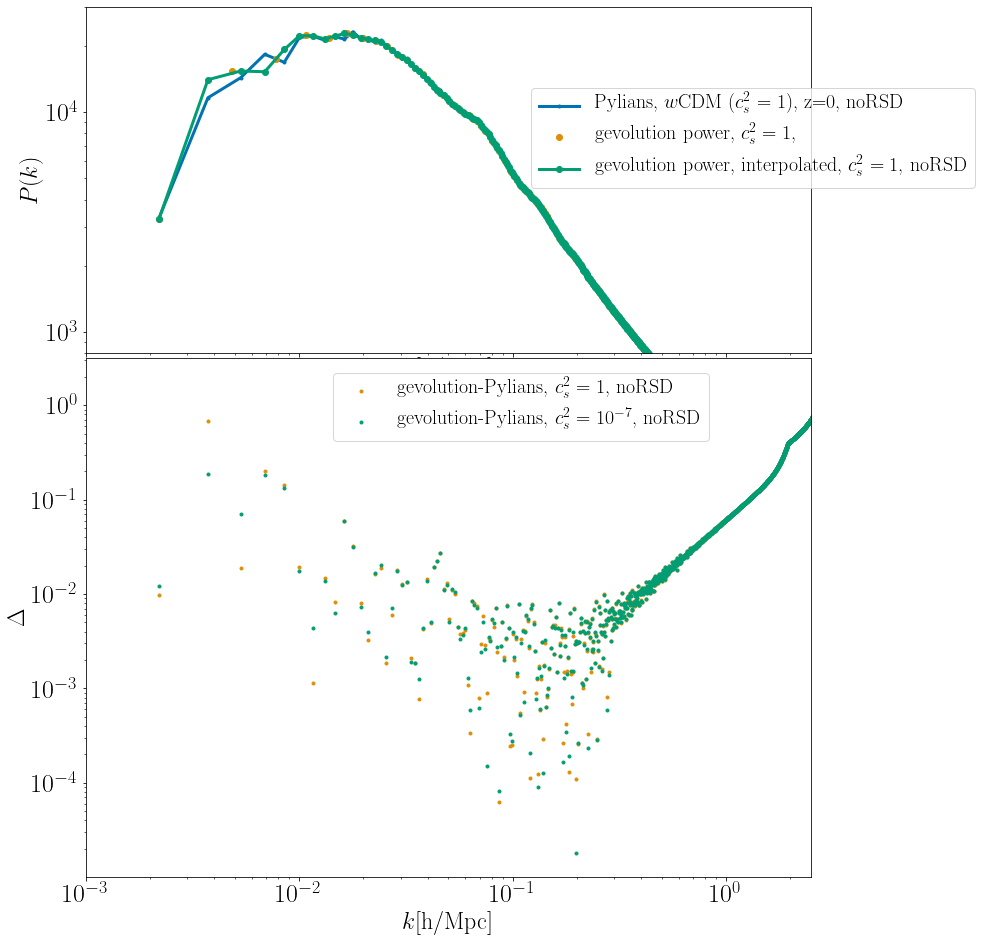

In [120]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,1.5]})
plt.subplots_adjust(hspace=0.01)

kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($c_s^2=1$), ","$w$CDM-gev ($c_s^2=10^{-7}$), ",
          "$w$CDM ($c_s^2=10^{-4}$), ","$w$CDM ($c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [1]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,".-",color =Colors[l], lw=3,label="Pylians, "+decrip[i]+z[j]+", "+RSD)
        l=l+1

k_pylians =data[kind][RSD][file[0]]['pow'][z[0]][0,:] 
k_w = pow_gev['gev_em0']['z=0'][:,0];
pk = pow_gev['gev_em0']['z=0'][:,1];
# interp_pow=InterpolatedUnivariateSpline(k_w,pk,k=5)
# pk = interp_pow(k_pylians);
# k_w =k_pylians
axs[0].loglog(k_w,pk*(2.*np.pi**2)/(k_w**3),"o",color =Colors[l], lw=3,label="gevolution power, $c_s^2=1$, ")

k_pylians =data[kind][RSD][file[0]]['pow'][z[0]][0,:] 
k_w = pow_gev['gev_em0']['z=0'][:,0];
pk = pow_gev['gev_em0']['z=0'][:,1];
interp_pow=InterpolatedUnivariateSpline(k_w,pk,k=2)
pk = interp_pow(k_pylians);
k_w =k_pylians
axs[0].loglog(k_w,pk*(2.*np.pi**2)/(k_w**3),"-o",color =Colors[l+1], lw=3,label="gevolution power, interpolated, $c_s^2=1$, "+RSD)

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_ylim(8.e2,3.e4)
axs[0].set_xlim(1.e-3,1)
axs[0].legend(fontsize=20,bbox_to_anchor=(0.6,0.45))

# Rel diff
kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($c_s^2=1$), ","$w$CDM-gev ($c_s^2=10^{-7}$), ",
          "$w$CDM ($c_s^2=10^{-4}$), ","$w$CDM ($c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

k_pylians =data[kind][RSD][file[0]]['pow'][z[0]][0,:] 
k_w = pow_gev['gev_em0']['z=0'][:,0];
pk = pow_gev['gev_em0']['z=0'][:,1];
interp_pow=InterpolatedUnivariateSpline(k_w,pk,k=3)
pk_gev = interp_pow(k_pylians)*(2.*np.pi**2)/(k_pylians**3);
pk_pylians = data[kind][RSD][file[1]]['pow'][z[0]][1,:]
axs[1].plot(k_pylians,np.abs(pk_gev-pk_pylians)/(0.5*(pk_pylians+pk_gev)),".",color =Colors[l], lw=3,label="gevolution-Pylians, $c_s^2=1$, "+RSD)


k_pylians =data[kind][RSD][file[4]]['pow'][z[0]][0,:] 
k_w = pow_gev['kev_em7']['z=0'][:,0];
pk = pow_gev['kev_em7']['z=0'][:,1];
interp_pow=InterpolatedUnivariateSpline(k_w,pk,k=2)
pk_gev = interp_pow(k_pylians)*(2.*np.pi**2)/(k_pylians**3);
pk_pylians = data[kind][RSD][file[4]]['pow'][z[0]][1,:]
axs[1].plot(k_pylians,np.abs(pk_gev-pk_pylians)/(0.5* (pk_pylians+pk_gev)),".",color =Colors[l+1], lw=3,label="gevolution-Pylians, $c_s^2=10^{-7}$, "+RSD)



axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
plt.yscale('log')
# axs[1].set_ylim(-0.2,0.3)
axs[1].set_xlim(1.e-3,2.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=20,bbox_to_anchor=(0.6,0.82))
# X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)

# cdm+b Powerspectra comparison, no RSD

No handles with labels found to put in legend.


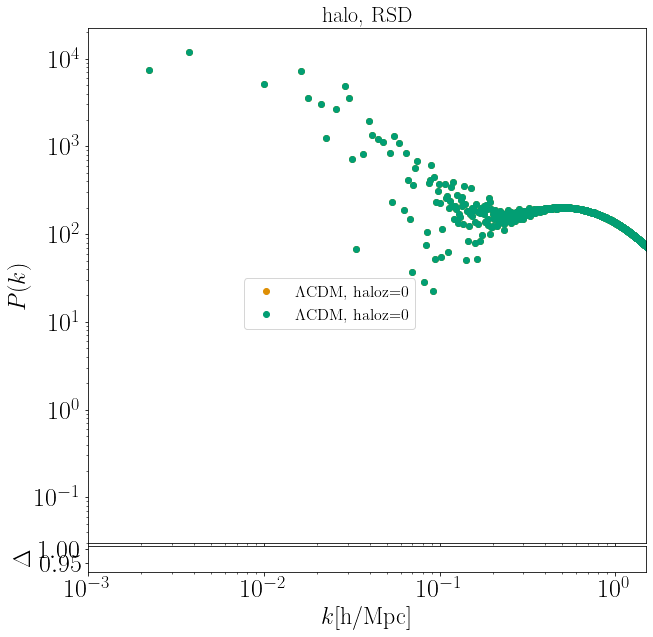

In [138]:
plt.rc('text', usetex=True, )
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size,
           }
matplotlib.rc('font', **font,)
fig, axs = plt.subplots(figsize=(10,10),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[2,0.1]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','kev_em4','gev_em7','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ", "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$)",
          "$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]

files_list_class = ['lcdm','cs2_1','cs2_e4','cs2_e7'];

z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0]: # file
    for j in [0]: # Redshifts
        [k_w,pk2]=data[kind][RSD][file[i]]['pow'][z[j]][[0,2],:]  
#         axs[0].loglog(k_w,pk,"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1
        [k_w,pk1]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,"o",color =Colors[l], lw=3,label=decrip[i]+kind+z[j])
        
        [k_w,pk2]=data['cdm'][RSD][file[i]]['pow'][z[j]][[0,2],:]  
#         axs[0].loglog(k_w,pk,"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1
        [k_w,pk1]=data['cdm'][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,"o",color =Colors[l], lw=3,label=decrip[i]+kind+z[j])
        
#         l = l+1
#         [k_w,pk3]=data[kind][RSD][file[i]]['pow'][z[j]][[0,3],:]  
#         axs[0].loglog(k_w,pk3/pk1,"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
#         l=l+1
#         axs[0].loglog(k_w,pk2/pk1,"o",color =Colors[l], lw=3,label=decrip[i]+z[j])

#         k_g=pow_gev[file[i]][z[j]][:,0]
#         pk_g = pow_gev[file[i]][z[j]][:,1]
#         axs[0].loglog(k_g,pk_g*(2.*np.pi**2)/(k_g**3),"-.",color =Colors[l], lw=3,label="gevolution")
        
#         k_class = class_data['power_cb_lin'][files_list_class[i]][z[j]][:,0]
#         pk_class = class_data['power_cb_lin'][files_list_class[i]][z[j]][:,1]
#         axs[0].loglog(k_class, pk_class ,"-",color =Colors[l], lw=3)
#         l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
# axs[0].set_ylim(5.e1,2.9*1.e5)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=16,bbox_to_anchor=(0.60,0.53))
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

# l=0
# for num1 in [0,1,3]: # file 1
#     for j in [0]: # Redshifts
#         num2=0
#         if(num1!=num2):
#             redshift ="z="+str(j);
#             [k1,pk1]=data[kind][RSD][file[num1]]['pow'][redshift][[0,1],:]
#             [k2,pk2]=data[kind][RSD][file[num2]]['pow'][redshift][[0,1],:]
#             axs[1].plot(k1,pk1/pk2,"-",color =Colors[l], lw=3,label="(gevolution)"+decrip[num2]+decrip[num1]+" "+redshift)
#             redshift ="z="+str(j);
#             k1 = class_data['power_cb_lin'][files_list_class[num1]][redshift][:,0]
#             pk1 = class_data['power_cb_lin'][files_list_class[num1]][redshift][:,1]
#             pk2 = class_data['power_cb_lin'][files_list_class[num2]][redshift][:,1] # LCDM
#             axs[1].plot(k1,(pk1)/pk2,":",color =Colors[l], lw=3, label="(CLASS) lin, Sync, "+redshift)
            
#             ### CLASS Non-linear matter
#             k1 = class_data['power_cb_nl'][files_list_class[num1]][redshift][:,0]
#             pk1 = class_data['power_cb_nl'][files_list_class[num1]][redshift][:,1]
#             pk2 = class_data['power_cb_nl'][files_list_class[num2]][redshift][:,1]
#             axs[1].plot(k1,(pk1)/pk2,":",color =Colors[l+4], lw=3, label="(CLASS) HMCode, Sync, "+redshift)
#             l=l+1;
            
#             ### CLASS transfer
#             redshift ="z="+str(j);
#             # Transfer function:
#             # LCDM
#             k_w_lcdm= class_data['tk'][files_list_class[num2]][redshift][:,0]
#             d_cdm_lcdm =class_data['tk'][files_list_class[num2]][redshift][:,3]
#             d_b_lcdm =class_data['tk'][files_list_class[num2]][redshift][:,2]
#             # densities from the bg file

#             rho_cdm_lcdm = interpolate.interp1d(class_data['bg'][files_list_class[num2]][:,0],class_data['bg'][files_list_class[num2]][:,10])
#             rho_b_lcdm = interpolate.interp1d(class_data['bg'][files_list_class[num2]][:,0],class_data['bg'][files_list_class[num2]][:,9])
#             d_m_lcdm = (d_cdm_lcdm * rho_cdm_lcdm(np.double(j))+ d_b_lcdm * rho_b_lcdm(np.double(j)))/(rho_cdm_lcdm(np.double(j))+ rho_b_lcdm(np.double(j)));
#             interp_delta_lcdm=InterpolatedUnivariateSpline(k_w_lcdm,d_m_lcdm, k=2)

#             #kessence
#             k_w=class_data['tk'][files_list_class[num1]][redshift][:,0] 
#             d_cdm =class_data['tk'][files_list_class[num1]][redshift][:,3]
#             d_b =class_data['tk'][files_list_class[num1]][redshift][:,2]
#             rho_cdm = interpolate.interp1d(class_data['bg'][files_list_class[num1]][:,0],class_data['bg'][files_list_class[num1]][:,10])
#             rho_b = interpolate.interp1d(class_data['bg'][files_list_class[num1]][:,0],class_data['bg'][files_list_class[num1]][:,9])
#             d_m = (d_cdm * rho_cdm(np.double(j)) 
#                    + d_b * rho_b(np.double(j)))/(rho_cdm(np.double(j))+ rho_b(np.double(j)));
#             interp_delta = InterpolatedUnivariateSpline(k_w,d_m, k=2)

#             d_m = interp_delta (k_w)
#             d_m_lcdm = interp_delta_lcdm (k_w)

#             axs[1].plot(k_w, (d_m/d_m_lcdm)**2,"-.",color =Colors[l], lw=3,
#                           label="(CLASS) Newtonian," + redshift)
#             l=l+1

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(0.92,1.01)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1])  
axs[1].legend(fontsize=20,bbox_to_anchor=[0.45,0.72],loc="center",frameon=False)
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo Powerspectra comparison,  no RSD

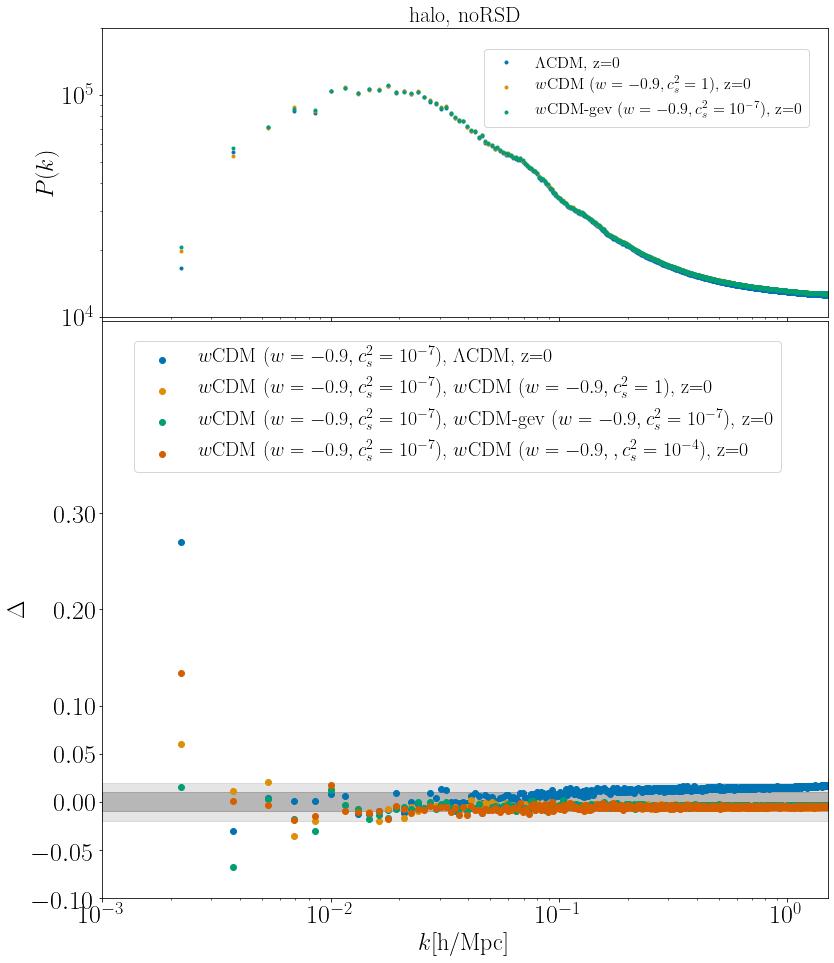

In [73]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,".",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(1.e4,2.e5)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=16,bbox_to_anchor=(0.75,0.63))
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][file[num1]]['pow'][z[j]][[0,1],:]
                [k2,pk2]=data[kind][RSD][file[num2]]['pow'][z[j]][[0,1],:]
                axs[1].plot(k1,(pk2-pk1)/pk1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.1,0.5)
axs[1].set_xlim(1.e-3,1.5)
axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=20,bbox_to_anchor=(0.95,0.72))
X=np.arange(0.001,20,1)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# cdm Powerspectra comparison,  RSD

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


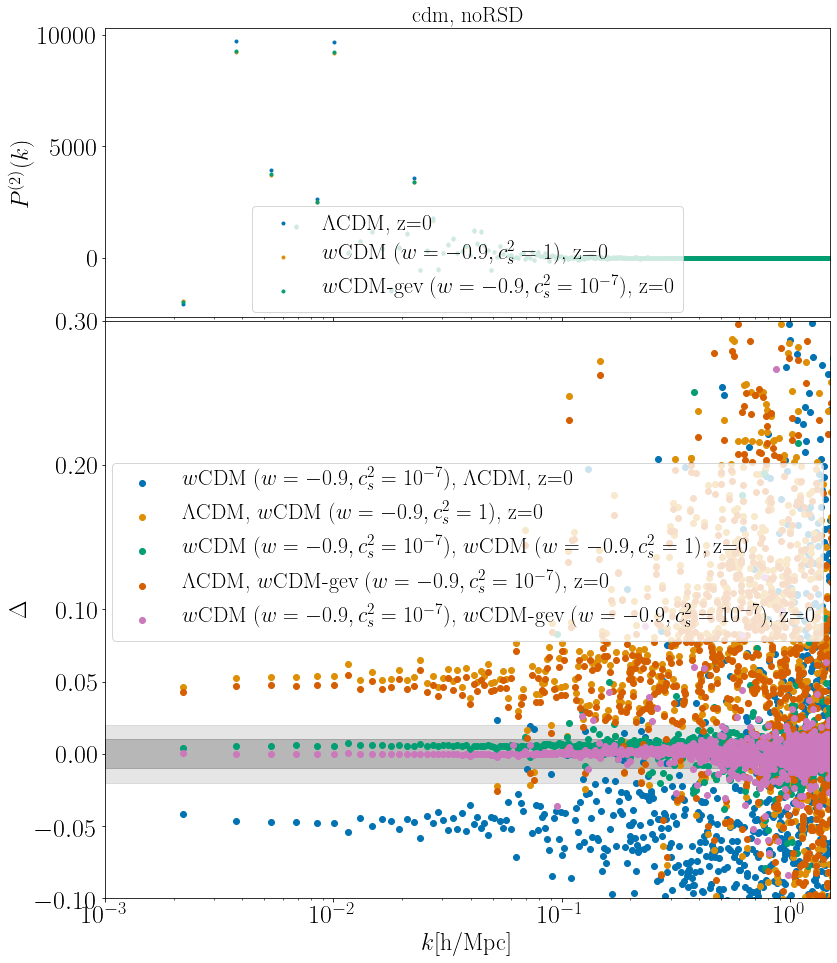

In [74]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,2],:]  
        axs[0].plot(k_w,pk,".",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$P^{(2)}(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
plt.xscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
# axs[0].set_ylim(1.,6.e4)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2]: # file 1
    for num2 in [0,4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][file[num1]]['pow'][z[j]][[0,2],:]
                [k2,pk2]=data[kind][RSD][file[num2]]['pow'][z[j]][[0,2],:]
                axs[1].plot(k1,(pk2-pk1)/(0.5*(pk1+pk2)),"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.1,0.1)
axs[1].set_xlim(1.e-3,1.5)
axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.6], loc='center')
X=np.arange(0.001,20,1)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


In [110]:
# ['lcdm', 'cs2_1', 'cs2_e4', 'cs2_e7']
print(rsd_coeff['lcdm']['z=0'],rsd_coeff['cs2_1']['z=0'])


1.4101587180787583 1.4083990265239525


# cdm power RSD and no-RSD

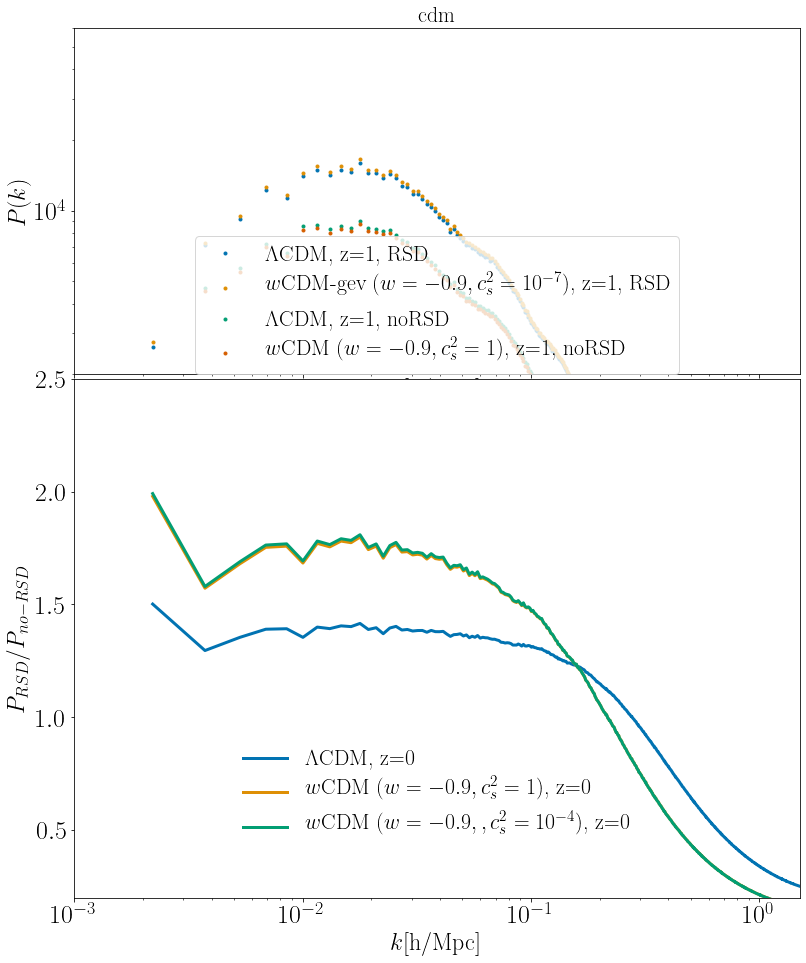

In [127]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,1.5]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];


# Computing RSD coefficient CLASS
l=0
for i in [0,2]: # file
    for j in [2]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,".",color =Colors[l], lw=3,label=decrip[i]+z[j]+", "+RSD)

        k_class = class_data['power_m_lin'][files_list_class[i]][z[j]][:,0]
        pk_class = class_data['power_m_lin'][files_list_class[i]][z[j]][:,1]
        axs[0].loglog(k_class, pk_class * np.double(rsd_coeff[files_list_class[i]][z[j]]) ,"-",alpha=0.6,color =Colors[l], lw=3)
        l=l+1

kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

for i in [0,1]: # file
    for j in [2]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,".",color =Colors[l], lw=3,label=decrip[i]+z[j]+", "+RSD)
        
        k_class = class_data['power_m_lin'][files_list_class[i]][z[j]][:,0]
        pk_class = class_data['power_m_lin'][files_list_class[i]][z[j]][:,1]
        axs[0].loglog(k_class, pk_class ,"-",alpha=0.6,color =Colors[l], lw=3)
        l=l+1
        
        
class_data['Bg'][files_list_class[j]]
axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(2.e3,6.e4)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
axs[0].set_title(kind, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,3]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
            
#             axs[1].axhline(y=rsd_coeff[files_list_class[num1]]["z="+str(j)],color =Colors[l], lw=3)

            l=l+1;

axs[1].set_ylabel('$P_{RSD}/P_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,2.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center',frameon=False)
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo Powerspectra comparison,  RSD

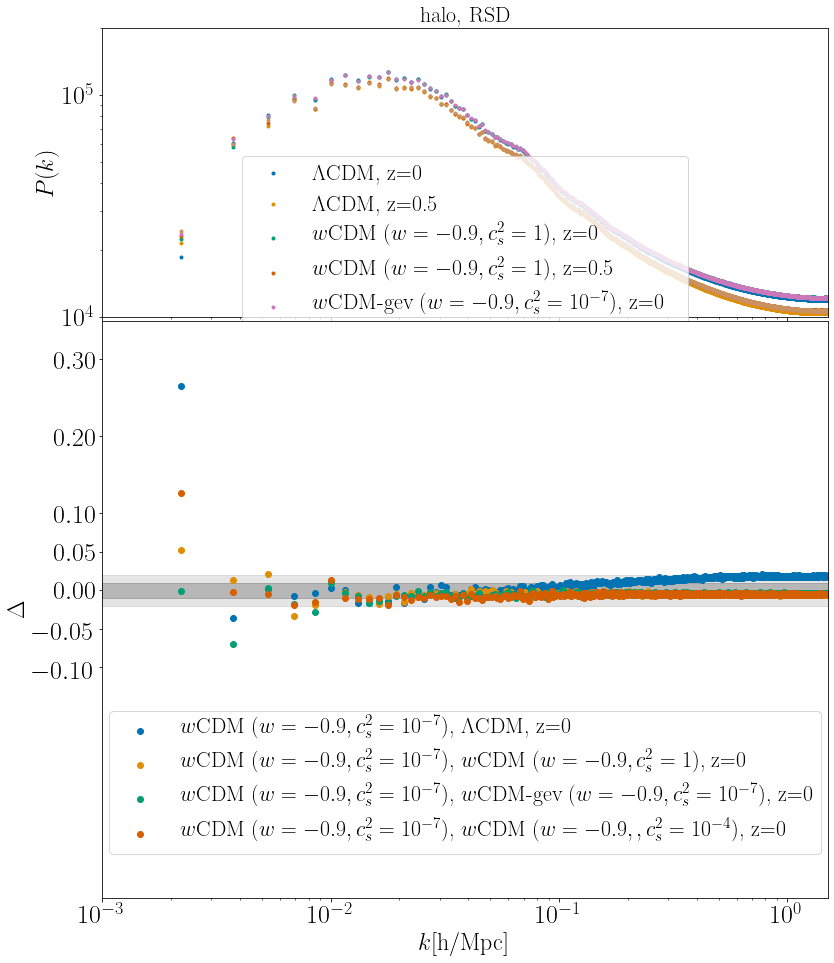

In [76]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0,1]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,".",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(1.e4,2.e5)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][file[num1]]['pow'][z[j]][[0,1],:]
                [k2,pk2]=data[kind][RSD][file[num2]]['pow'][z[j]][[0,1],:]
                axs[1].plot(k1,(pk2-pk1)/pk1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.4,0.35)
axs[1].set_xlim(1.e-3,1.5)
axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
X=np.arange(0.001,20,1)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo power RSD and no-RSD

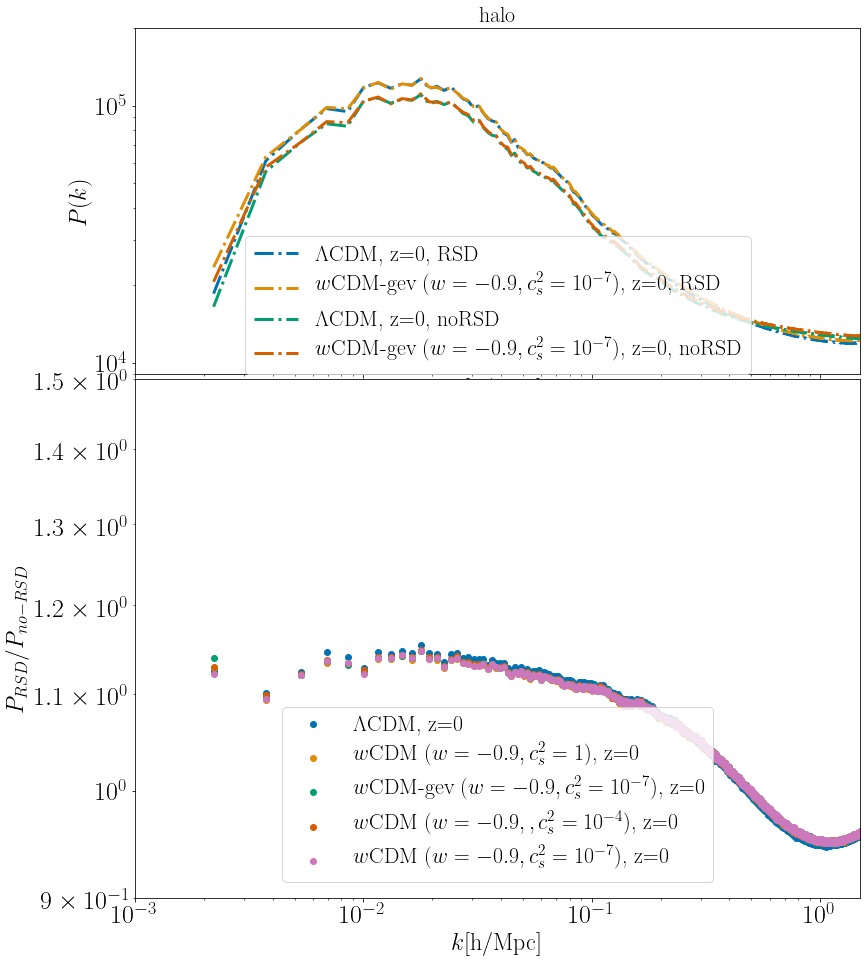

In [77]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,1.5]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+", "+RSD)
        l=l+1

RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

for i in [0,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+", "+RSD)
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(9.e3,2.e5)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
axs[0].set_title(kind, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$P_{RSD}/P_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
plt.yscale('log')
axs[1].set_ylim(0.9,1.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo vs cdm, RSD and noRSD

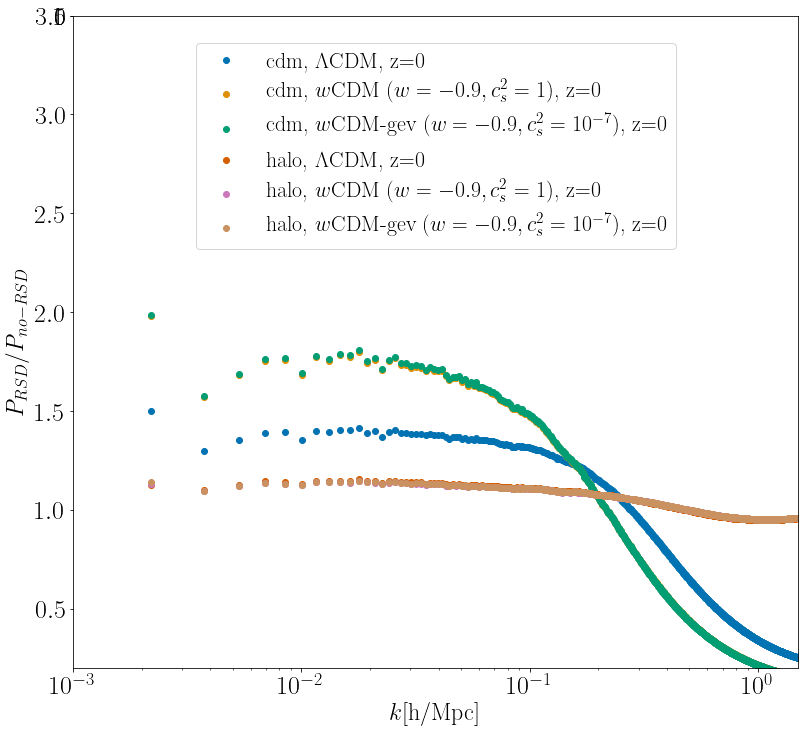

In [78]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
# for i in [0,2]: # file
#     for j in [0]: # Redshifts
#         [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
#         axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+", "+RSD)
#         l=l+1

# RSD ='noRSD'
# file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
# decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
#           "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
# z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

# for i in [0,2]: # file
#     for j in [0]: # Redshifts
#         [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
#         axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+", "+RSD)
#         l=l+1

# axs[0].set_ylabel('$P(k)$',fontsize=24)
# axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# # plt.yscale('log')
# # axs[0].xticks(size = 25);
# # axs[0].yticks(size = 25);
# axs[0].set_ylim(9.e3,2.e5)
# axs[0].set_xlim(1.e-3,2.e0)
# axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
# axs[0].set_title(kind, fontsize=22)
# # Relative difference:

kind = "cdm"
l=0
for num1 in [0,1,2]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;
kind = 'halo'
for num1 in [0,1,2]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$P_{RSD}/P_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,3.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.8], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo vs cdm, RSD and noRSD redshift evolution

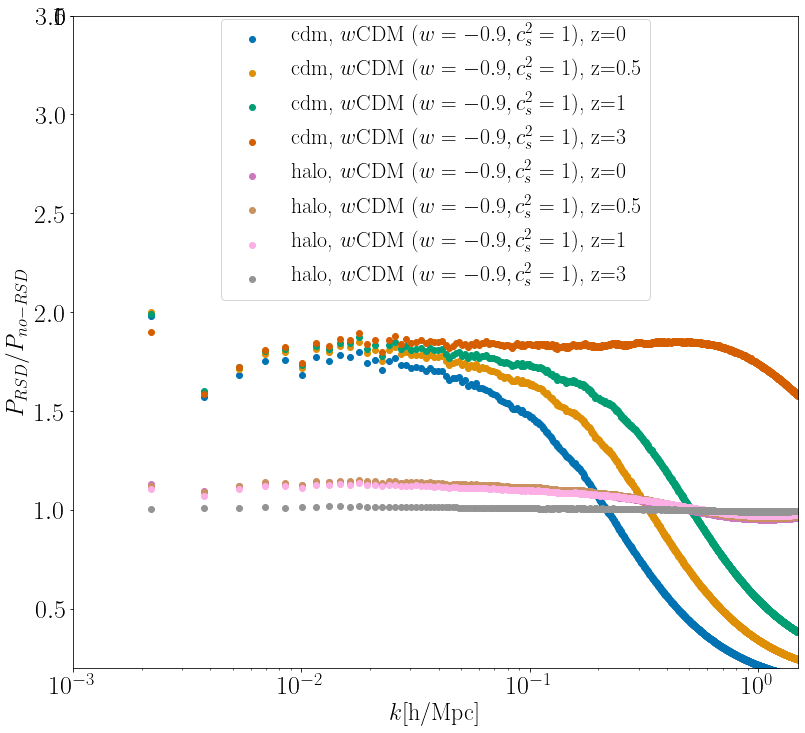

In [79]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind = "cdm"
l=0
for num1 in [1]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;
kind = 'halo'
for num1 in [1]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$P_{RSD}/P_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,3.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


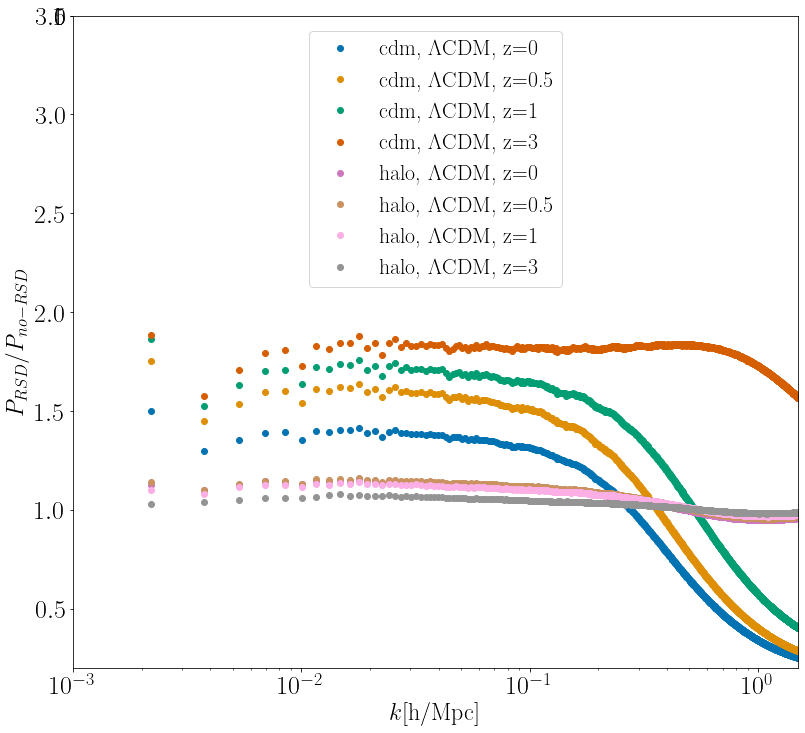

In [80]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind = "cdm"
l=0
for num1 in [0]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;
kind = 'halo'
for num1 in [0]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$P_{RSD}/P_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,3.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo over cdm power spectrum

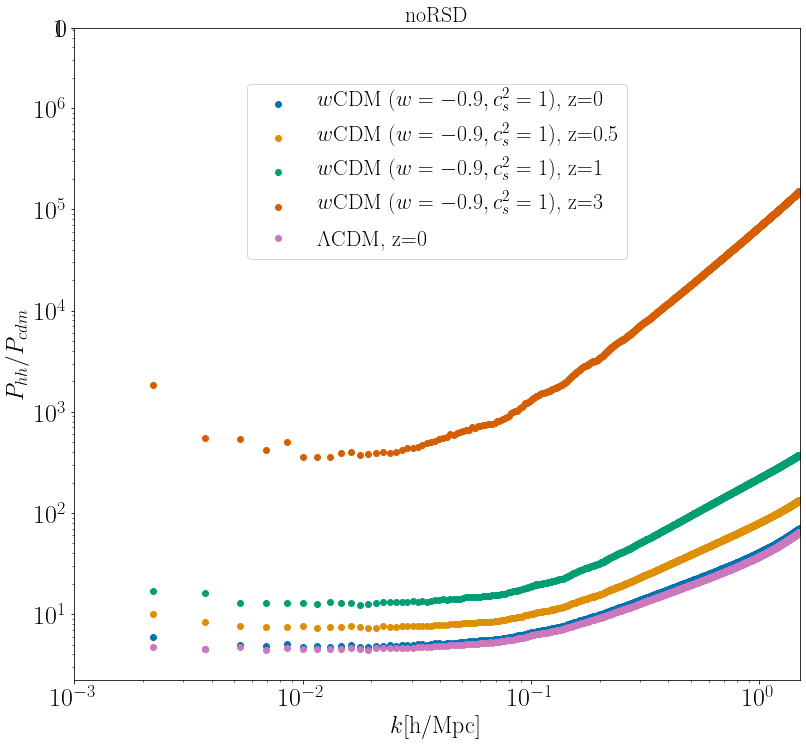

In [81]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind1 = "cdm"
kind2 = "halo"
l=0
for num1 in [1]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind1]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
            l=l+1;
for num1 in [0]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind1]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
            l=l+1;
axs[1].set_title(RSD, fontsize=22)
axs[1].set_ylabel('$P_{hh}/P_{cdm}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
plt.yscale('log')
# axs[1].set_ylim(0.2,3.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Correlation function cdm, no RSD

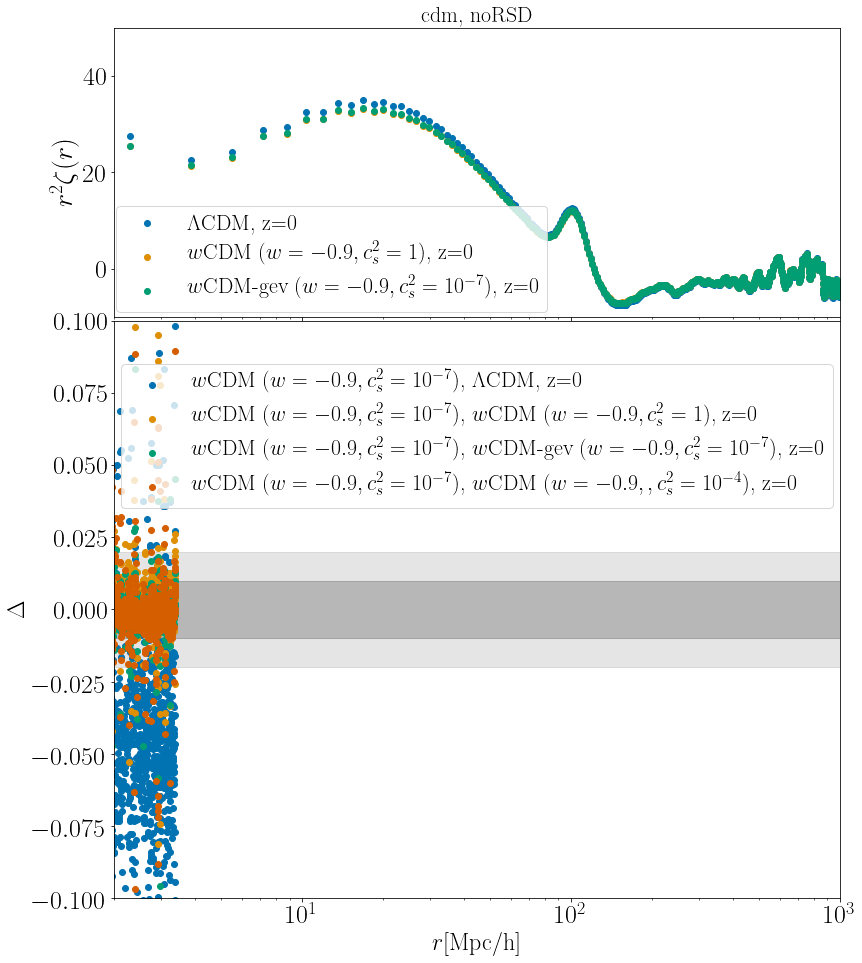

In [82]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='noRSD'
file_type = 'cor'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind][RSD][file[i]][file_type][z[j]][[0,1],:]  
        axs[0].plot(r,zeta*r**2,"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$r^2 \zeta(r)$',fontsize=28)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_ylim(-10,50)
# axs[0].set_xlim(1.e-2,500)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.3, 0.2], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [r1,zeta1]=data[kind][RSD][file[num1]][file_type][z[j]][[0,1],:]
                [r2,zsta2]=data[kind][RSD][file[num2]][file_type][z[j]][[0,1],:]
                axs[1].plot(k1,(zsta2-zeta1)/zeta1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.1,0.1)
axs[1].set_xlim(2,1000)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.8], loc='center')
X=np.arange(0.001,2000,20)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Correlation function cdm, RSD

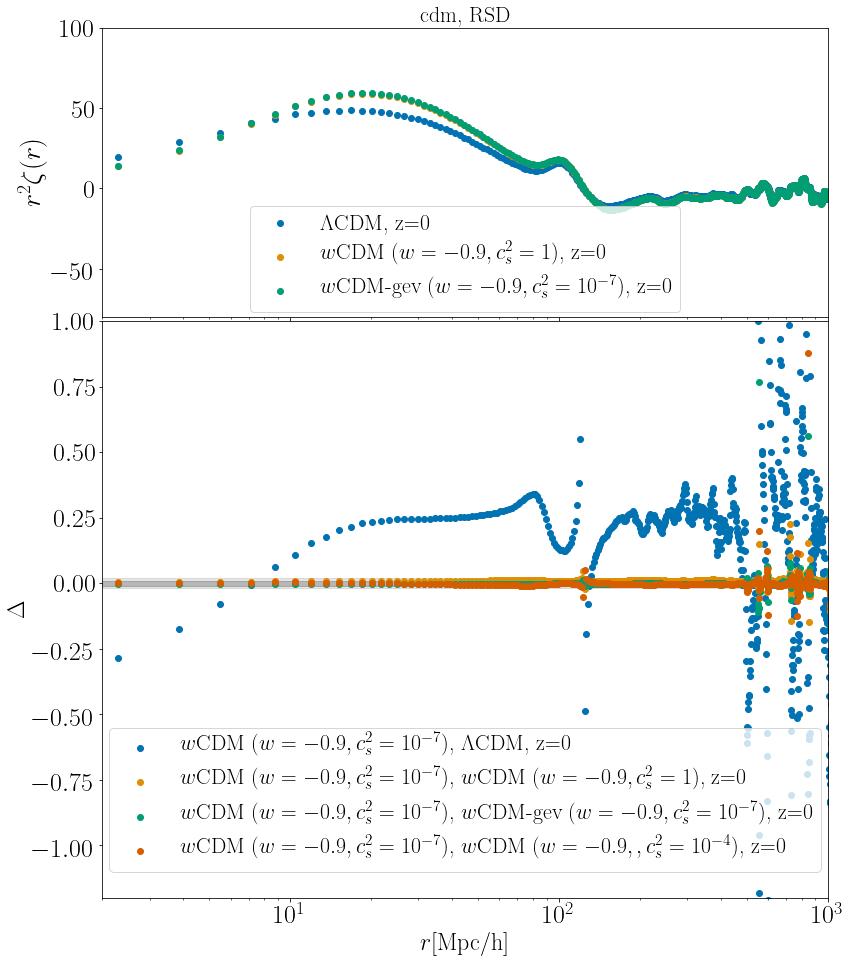

In [90]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='RSD'
file_type = 'cor'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind][RSD][file[i]][file_type][z[j]][[0,1],:]  
        axs[0].plot(r,zeta*r**2,"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$r^2 \zeta(r)$',fontsize=28)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_ylim(-8.e1,1.e2)
# axs[0].set_xlim(1.e-2,500)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [r1,zeta1]=data[kind][RSD][file[num1]][file_type][z[j]][[0,1],:]
                [r2,zsta2]=data[kind][RSD][file[num2]][file_type][z[j]][[0,1],:]
                axs[1].plot(k1,(zsta2-zeta1)/zeta1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-1.2,1.0)
axs[1].set_xlim(2,1000)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.17], loc='center')
X=np.arange(0.001,2000,20)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo  Correlation function, noRSD

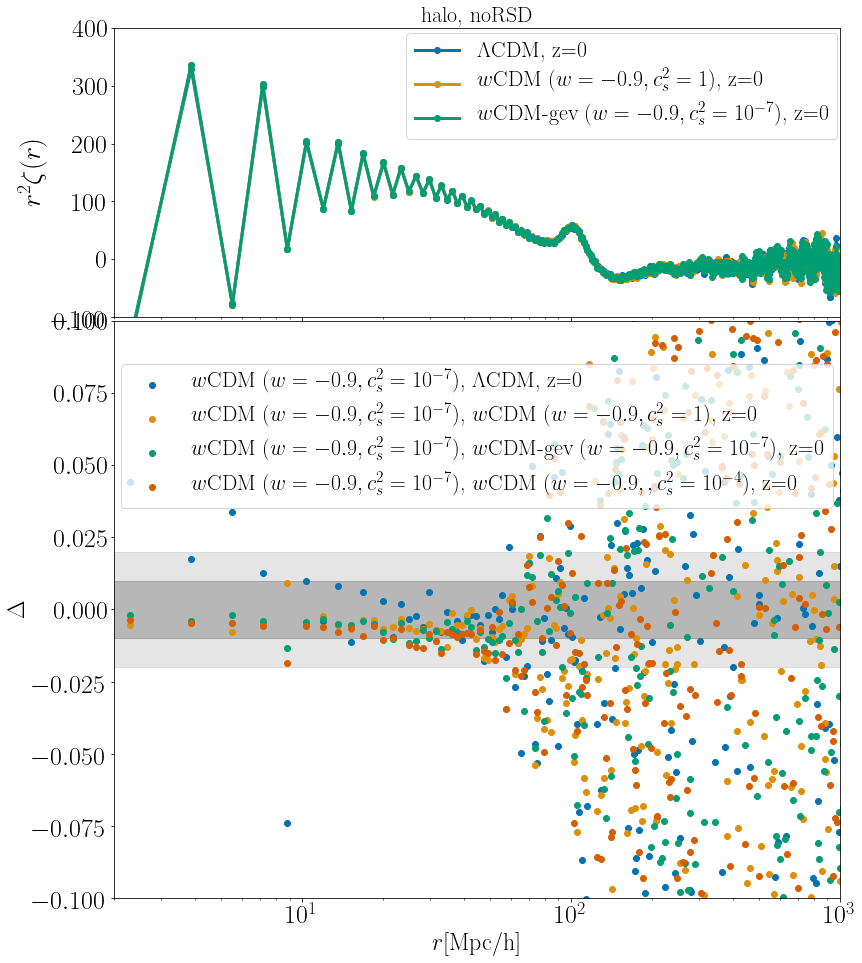

In [84]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='noRSD'
file_type = 'cor'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind][RSD][file[i]][file_type][z[j]][[0,1],:]  
        axs[0].plot(r,zeta*r**2,"-o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$r^2 \zeta(r)$',fontsize=28)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_ylim(-100,400)
# axs[0].set_xlim(1.e-2,500)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.7, 0.8], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [r1,zeta1]=data[kind][RSD][file[num1]][file_type][z[j]][[0,1],:]
                [r2,zsta2]=data[kind][RSD][file[num2]][file_type][z[j]][[0,1],:]
                axs[1].plot(r1,(zsta2-zeta1)/zeta1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.1,0.1)
axs[1].set_xlim(2,1000)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.8], loc='center')
X=np.arange(0.001,2000,20)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo  Correlation function, RSD

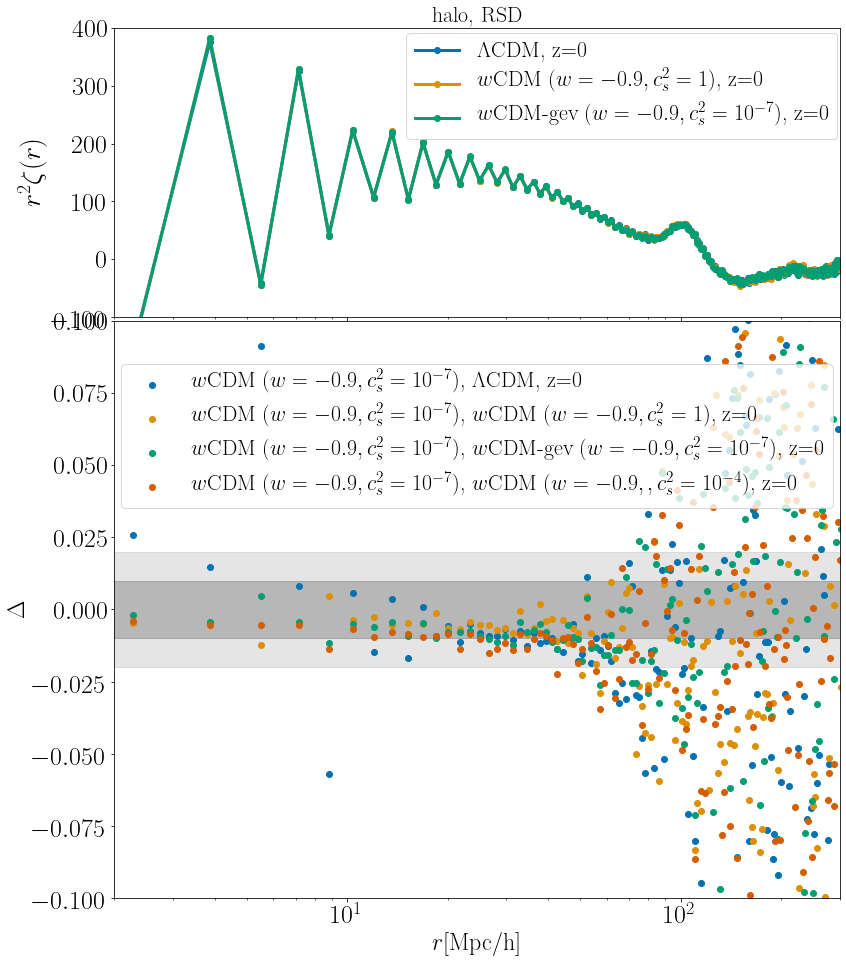

In [85]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='RSD'
file_type = 'cor'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind][RSD][file[i]][file_type][z[j]][[0,1],:]  
        axs[0].plot(r,zeta*r**2,"-o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$r^2 \zeta(r)$',fontsize=28)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_ylim(-100,400)
# axs[0].set_xlim(1.e-2,500)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.7, 0.8], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [r1,zeta1]=data[kind][RSD][file[num1]][file_type][z[j]][[0,1],:]
                [r2,zsta2]=data[kind][RSD][file[num2]][file_type][z[j]][[0,1],:]
                axs[1].plot(r1,(zsta2-zeta1)/zeta1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.1,0.1)
axs[1].set_xlim(2,300)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.8], loc='center')
X=np.arange(0.001,2000,20)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# correlation function RSD, noRSD comparison

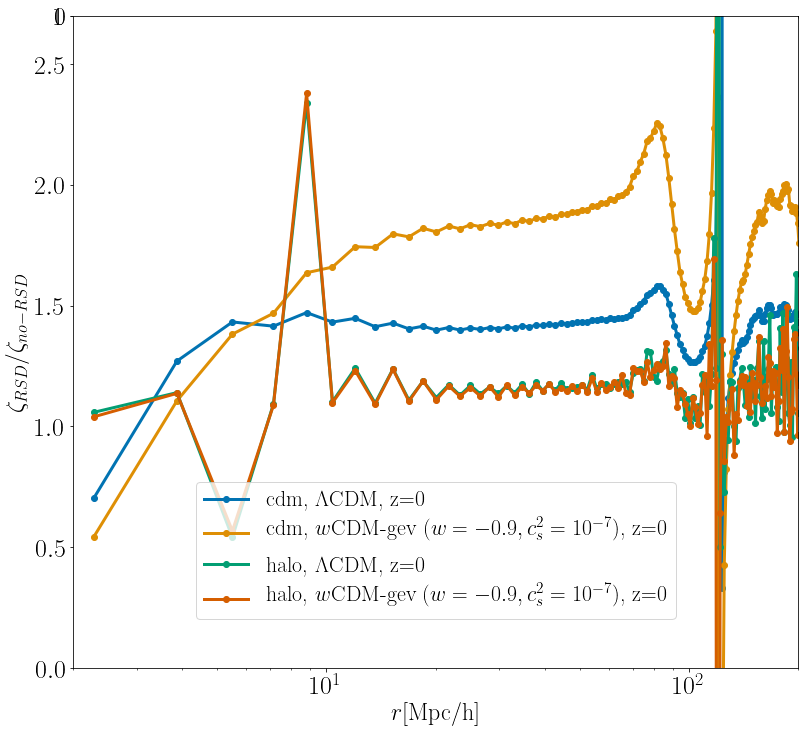

In [86]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
file_type = 'cor'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind = "cdm"
l=0
for num1 in [0,2]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]][file_type][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]][file_type][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"-o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;
kind = 'halo'
for num1 in [0,2]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]][file_type][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]][file_type][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"-o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$\zeta_{RSD}/\zeta_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0,2.7)
axs[1].set_xlim(2,200)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.18], loc='center')
# X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# quadrupole moment RSD, noRSD, halo

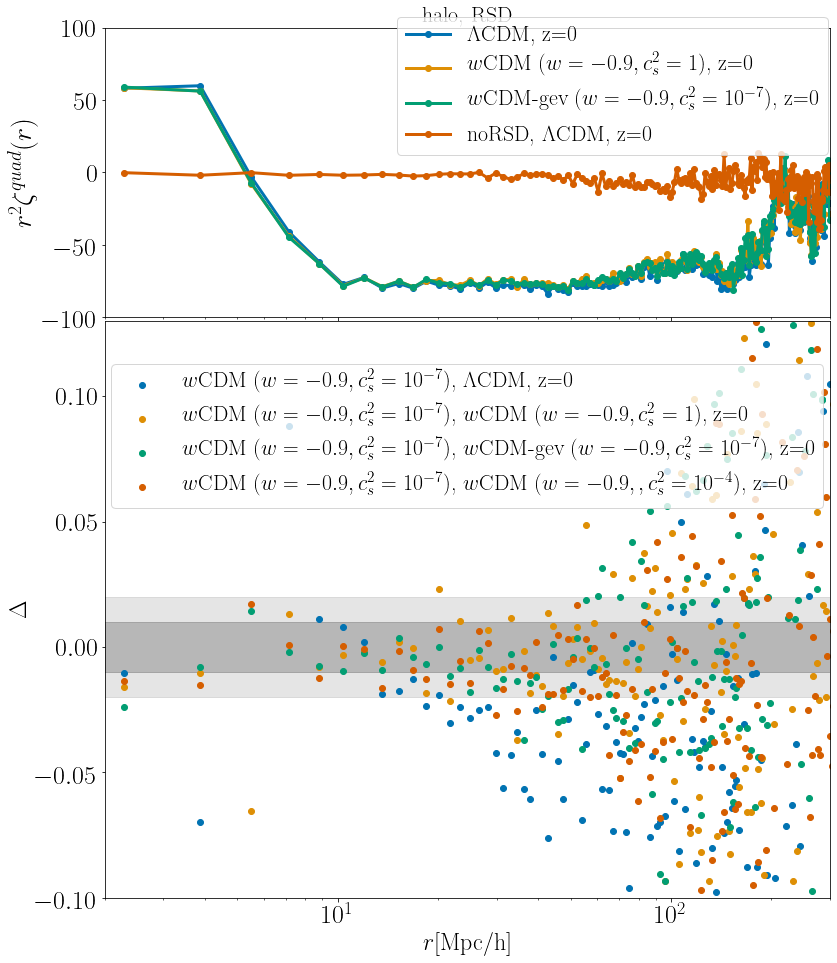

In [87]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='RSD'
file_type = 'cor'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind][RSD][file[i]][file_type][z[j]][[0,2],:]  
        axs[0].plot(r,zeta*r**2,"-o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1
        
for i in [0]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind]['noRSD'][file[i]][file_type][z[j]][[0,2],:]  
        axs[0].plot(r,zeta*r**2,"-o",color =Colors[l], lw=3,label="noRSD, "+decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$r^2 \zeta^{quad}(r)$',fontsize=28)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_ylim(-100,100)
# axs[0].set_xlim(1.e-2,500)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.7, 0.8], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [r1,zeta1]=data[kind][RSD][file[num1]][file_type][z[j]][[0,2],:]
                [r2,zsta2]=data[kind][RSD][file[num2]][file_type][z[j]][[0,2],:]
                axs[1].plot(r1,(zsta2-zeta1)/zeta1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.1,0.13)
axs[1].set_xlim(2,300)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.8], loc='center')
X=np.arange(0.001,2000,20)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# quadrupole moment RSD, noRSD, cdm

In [ ]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='RSD'
file_type = 'cor'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind][RSD][file[i]][file_type][z[j]][[0,2],:]  
        axs[0].plot(r,zeta*r**2,"-o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1
        
for i in [0]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind]['noRSD'][file[i]][file_type][z[j]][[0,2],:]  
        axs[0].plot(r,zeta*r**2,"-o",color =Colors[l], lw=3,label="noRSD, "+decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$r^2 \zeta^{quad}(r)$',fontsize=28)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_ylim(-120,150)
# axs[0].set_xlim(1.e-2,500)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.7, 0.76], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [r1,zeta1]=data[kind][RSD][file[num1]][file_type][z[j]][[0,2],:]
                [r2,zsta2]=data[kind][RSD][file[num2]][file_type][z[j]][[0,2],:]
                axs[1].plot(r1,(zsta2-zeta1)/zeta1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
plt.yscale('symlog')
axs[1].set_ylim(-1,1)
axs[1].set_xlim(2,300)
axs[1].set_yticks([-0.5,-0.05,0,0.05,0.5,1])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.8], loc='center')
X=np.arange(0.001,2000,20)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)
